# Analiza ankiety stackoverflow 2020
## Kamil Misiak

W tym sprawozdaniu przeprowadzę analizę zbioru danych zawierające dane z ankiety przeprowadzonej przez portal stackoverflow. Zbiór danych zostanie załadowany, oczyszczony i przeanalizowany.

## Agenda
1. Załadowanie zbioru danych i wstępne statystyki
2. Przygotowanie danych
3. Analiza i wizualizacja danych

## Krok 1: Załadowanie zbioru danych i wstępne statystyki

In [1]:
# Przygotowanie danych
import pandas as pd
import numpy as np

# Wizualizacja
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dostosowanie wyglądu wizualizacji
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

# Klasyfikacja
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Scieżki do plików (dane, schemat)
data_file_name = './data/survey_results_public.csv'
schema_file_name = './data/survey_results_schema.csv'

# Załadowanie zbioru
data_raw = pd.read_csv(data_file_name, sep=',', header=0)

#### Następnie przyjrzmy się atrybutom które występują w zbiorze danych

In [2]:
data_raw.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

#### Następnie wyświetlimy 5 pierwszych rekordów

In [3]:
data_raw.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


#### Oraz końcowe 5 rekordów

In [4]:
data_raw.tail()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN
64460,65112,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Spain,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",ASP.NET Core;jQuery,Angular;Angular.js;ASP.NET Core;jQuery,NaN,NaN,NaN,NaN


#### Podgląd zbioru

In [5]:
print(data_raw.shape)
print('\n')
print(data_raw.dtypes)

(64461, 61)


Respondent              int64
MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode             object
                       ...   
WebframeWorkedWith     object
WelcomeChange          object
WorkWeekHrs           float64
YearsCode              object
YearsCodePro           object
Length: 61, dtype: object


#### Liczba atrybutów oraz typ danych

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

Jak widać w zbiorze mamy 64461 rekrody, które zawierają 61 atrybutów.
#### Następnie wyświetlimy podstawowe statystki opisowe atrybutów

In [7]:
data_raw.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


#### Do zbioru danych dodatkowo dołączony jest plik zawierający opisy zawartości atrybutów

In [8]:
schema_raw = pd.read_csv(schema_file_name, index_col='Column')
pd.set_option('display.max_rows', schema_raw.shape[0]+1)
pd.set_option('max_colwidth', None)
schema_raw

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order of survey response time)
MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
Hobbyist,Do you code as a hobby?
Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
CompFreq,"Is that compensation weekly, monthly, or yearly?"
CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
Country,Where do you live?


Następnie przygotujemy zmienną dzięki której będziemy mogli odczytywać pytanie należące do danej kolumny.

In [9]:
schema_raw = pd.read_csv(schema_file_name, index_col='Column').QuestionText

In [10]:
# Dowolna nazwa kolumny
schema_raw['WorkWeekHrs']

'On average, how many hours per week do you work? Please enter a whole number in the box.'

## Krok 2: Przygotowanie danych

Niektóre kolumny posiadają źle określony typ danych, co może skutkować błędami w dalszym przygotowaniu zbioru do analizy. Nasze przygotowanie rozpoczniemy od wskazania prawidłowego typu danych w kolumnach.

Atrybut "Age" zawiera liczby typu "float" odzielone znakiem przecinka, co jest błędnie rozpoznawana przez interpreter. Aby typ kolumny został prawidłowo przekonwerotowany do typu float, musimy zamienieć znak przecnika na kropkę.

In [11]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

W atrybucie "Fare" dodatkowo jeden z wierszy zawiera znak alfanumeryczny. Musimy przefiltrować wartości kolumny, aby zawierała tylko cyfry.

In [12]:
len(selected_columns)

20

Po przekstałecniu typów danych tak prezentują się kolumny oraz 10 pierwszych wierszy zbioru.

In [13]:
data = data_raw[selected_columns].copy()

In [14]:
schema = schema_raw[selected_columns]

Wyświetlimy podstawowe informacje o ramce danych

In [15]:
data.shape

(64461, 20)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Następnie określimy pradwidłowe typy dla naszy danych

Zaczniemy od atrybutu "Age1stCode"

In [17]:
schema['Age1stCode']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

Według pytania, atrybut powinnien zawierać wartości liczbowe określające wiek osoby ankietowanej

In [18]:
data['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

Jak widać trafiają się również ciągi znaków np, "Older than 85". Zamiennimy te wartości na puste, ponieważ określają one warotści odstające, które nie są przydatne w anzalizie. Wykonamy tą samą operacje dla 'YearsCode' oraz 'YearsCodePro' ponieważ te atrybuty określają podobne wartości. Poniższe operacje przekstzałcą wartości liczobwe na liczby, a ciągi znaków na wartości puste.

In [19]:
data['Age1stCode'] = pd.to_numeric(data['Age1stCode'], errors='coerce')
data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')

Wyświetlimy podstawe informacje po przekształceniu wartości

In [20]:
data.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


Wydaje się, że występuje problem z kolumną wieku, ponieważ minimalna wartość to 1, a maksymalna to 279. Jest to częsty problem z ankietami: odpowiedzi mogą zawierać nieprawidłowe wartości z powodu przypadkowych lub celowych błędów podczas odpowiadania. Prostym rozwiązaniem byłoby zignorowanie wierszy, w których wiek jest wyższy niż 100 lat lub niższy niż 10 lat, jako nieprawidłowe odpowiedzi na ankietę. Możemy to zrobić za pomocą metody .drop,

In [21]:
data.drop(data[data['Age'] < 10].index, inplace=True)
data.drop(data[data['Age'] > 100].index, inplace=True)

To samo dotyczy WorkWeekHrs. Zignorujmy wpisy, w których wartość kolumny jest większa niż 140 godzin. (~ 20 godzin dziennie).

In [22]:
data.drop(data[data['WorkWeekHrs'] > 140].index, inplace=True)

Kolumna płeć pozwala również na wybranie wielu opcji. Usuniemy wartości zawierające więcej niż jedną opcję, aby uprościć naszą analizę.

In [23]:
data['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [24]:
data.where(~(data['Gender'].str.contains(';', na=False)), np.nan, inplace=True)

Wyczyściliśmy teraz i przygotowaliśmy zbiór danych do analizy. Przyjrzyjmy się próbce wierszy z ramki danych.

In [25]:
data.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
13530,Russian Federation,33.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or software engineering",Yes,11.0,22.0,15.0,Go;JavaScript;Objective-C;Python;Ruby;Swift,Go;JavaScript;Ruby;Swift,Once every few years,Meditate;Visit Stack Overflow;Go for a walk or other physical activity;Do other work and come back later,Employed full-time,"Developer, back-end;Developer, full-stack;DevOps specialist;Senior executive/VP",50.0,Slightly satisfied,"Languages, frameworks, and other technologies I’d be working with;How widely used or impactful my work output would be;Office environment or company culture",Often: 1-2 days per week or more,Very important
42701,Israel,31.0,Woman,NaN,"A business discipline (such as accounting, finance, marketing, etc.)",No,15.0,6.0,2.0,Bash/Shell/PowerShell;C;Python,C;C++;Python,Once a year,Call a coworker or friend;Visit Stack Overflow;Go for a walk or other physical activity;Panic;Watch help / tutorial videos;Do other work and come back later,Employed full-time,"Developer, embedded applications or devices",48.0,Very satisfied,Diversity of the company or organization;How widely used or impactful my work output would be;Opportunities for professional development,Often: 1-2 days per week or more,Somewhat important
15012,Viet Nam,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or software engineering",Yes,13.0,5.0,2.0,JavaScript;Ruby,Go;Haskell;JavaScript;Ruby,Once a year,Call a coworker or friend;Visit Stack Overflow;Panic;Watch help / tutorial videos;Do other work and come back later;Visit another developer community (please name):,Employed full-time,"Developer, back-end;Developer, front-end;Developer, full-stack;Developer, mobile",40.0,Slightly satisfied,"Languages, frameworks, and other technologies I’d be working with;Office environment or company culture;Opportunities for professional development",Rarely: 1-2 days per year or less,Critically important
21687,Jordan,33.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or software engineering",No,15.0,15.0,11.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript;Python;SQL;TypeScript,C#;HTML/CSS;Java;JavaScript;SQL;TypeScript,Once a year,Play games;Visit Stack Overflow;Go for a walk or other physical activity;Panic;Do other work and come back later,Employed full-time,"Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile",40.0,Slightly dissatisfied,Flex time or a flexible schedule;Financial performance or funding status of the company or organization;Office environment or company culture,Occasionally: 1-2 days per quarter but less than monthly,Very important
49813,Ireland,38.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or software engineering",Yes,12.0,26.0,14.0,Bash/Shell/PowerShell;C#;JavaScript;PHP;Python,C#;Python,Once a year,Call a coworker or friend;Visit Stack Overflow;Go for a walk or other physical activity;Watch help / tutorial videos;Visit another developer community (please name):,Employed full-time,NaN,NaN,NaN,NaN,NaN,Critically important
1921,India,NaN,Man,Primary/elementary school,NaN,Yes,15.0,2.0,NaN,HTML/CSS;Java;JavaScript;Kotlin,C;C#;C++;Dart;Go;Objective-C;Python;SQL;Swift,Every few months,Visit Stack Overflow,"Not employed, but looking for work","Developer, back-end;Developer, game or graphics;Developer, mobile",NaN,NaN,"Industry that I’d be working in;Languages, frameworks, and other technologies I’d be working with;How widely used or impactful my work output would be",NaN,NaN
49851,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Java;JavaScript;Kotlin,Once a year,NaN,Employed f

## Krok 3: Analiza i wizualizacja danych

Zanim zadamy pytania dotyczące odpowiedzi na ankietę, pomocne byłoby zrozumienie danych demograficznych respondentów, tj. Kraju, wieku, płci, poziomu wykształcenia, poziomu zatrudnienia itp. Konieczne jest zbadanie tych zmiennych, aby zrozumieć, jak reprezentatywna jest ankieta dla światowa społeczność programistów. Badanie tej skali zwykle ma pewne tendencje w wyborze.

#### Atrybut "Country"

Przyjrzyjmy się liczbie krajów, z których pochodzą odpowiedzi w ankiecie, i wykreślmy dziesięć krajów z największą liczbą odpowiedzi.

In [31]:
schema['Country']

'Where do you live?'

In [33]:
data['Country'].nunique()

183

Kraje o największej liczbie respondentów możemy zidentyfikować metodą value_counts.

In [35]:
top_countries = data['Country'].value_counts().head(10)
top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

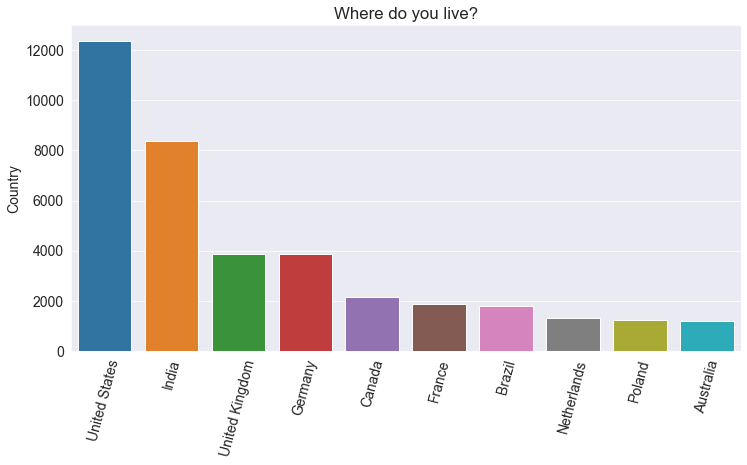

In [36]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

Wydaje się, że nieproporcjonalnie duża liczba respondentów pochodzi z USA i Indii, prawdopodobnie dlatego, że ankieta jest prowadzona w języku angielskim, a kraje te mają największą populację anglojęzyczną. Już teraz widzimy, że ankieta może nie być reprezentatywna dla globalnej społeczności programistów - zwłaszcza z krajów nieanglojęzycznych. Programiści z krajów nieanglojęzycznych są prawie na pewno niedostatecznie reprezentowani.

#### Atrybut "Age"
Rozkład wieku respondentów jest kolejnym ważnym czynnikiem, na który należy zwrócić uwagę. Do wizualizacji możemy użyć histogramu.

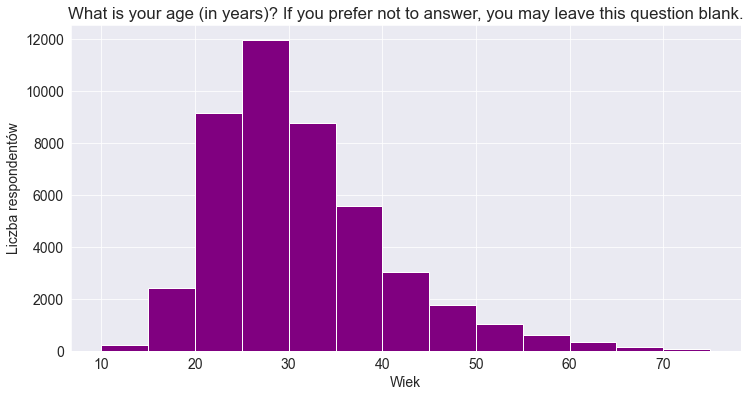

In [39]:
plt.figure(figsize=(12, 6))
plt.title(schema['Age'])
plt.xlabel('Wiek')
plt.ylabel('Liczba respondentów')

plt.hist(data['Age'], bins=np.arange(10,80,5), color='purple');

Wydaje się, że duży odsetek respondentów ma 20-45 lat. Jest to w pewnym stopniu reprezentatywne dla społeczności programistów w ogóle. Wielu młodych ludzi podjęło się informatyki jako kierunku studiów lub zawodu w ciągu ostatnich 20 lat.

Ćwiczenie: możesz odfiltrować odpowiedzi według wieku (lub grupy wiekowej), jeśli chcesz przeanalizować i porównać wyniki ankiety dla różnych grup wiekowych. Utwórz nową kolumnę o nazwie AgeGroup zawierającą wartości, takie jak Mniej niż 10 lat, 10-18 lat, 18-30 lat, 30-45 lat, 45-60 lat i Starsze niż 60 lat. Następnie powtórz analizę w pozostałej części tego notatnika dla każdej grupy wiekowej.

#### Atrybut "Gender"
Przyjrzyjmy się rozkładowi odpowiedzi dla płci. Powszechnie wiadomo, że kobiety i płcie niebinarne są niedostatecznie reprezentowane w społeczności programistów, więc możemy spodziewać się tutaj wypaczonej dystrybucji.

In [40]:
schema['Gender']

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [41]:
gender_counts = data['Gender'].value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

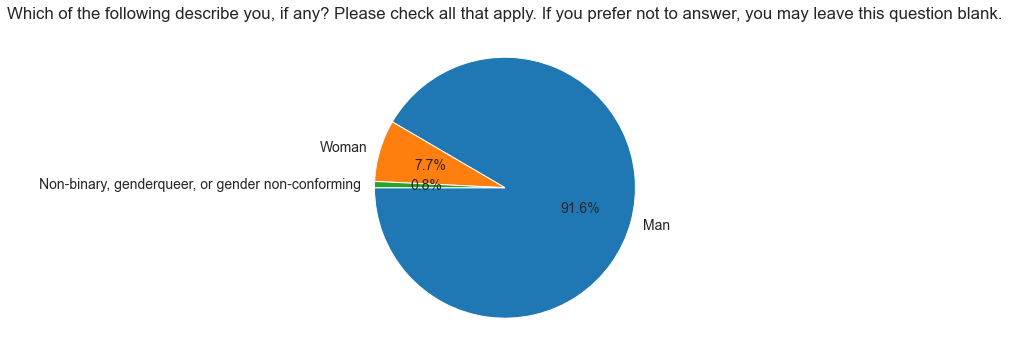

In [42]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Tylko około 8% respondentów, którzy odpowiedzieli na pytanie, identyfikuje się jako kobiety lub osoby niebinarne. Liczba ta jest niższa niż ogólny odsetek kobiet i niebinarnych płci w społeczności programistów - szacowany na około 12%.

Ćwiczenie: Byłoby interesujące porównać odpowiedzi i preferencje ankietowe dla różnych płci. Powtórz tę analizę z tymi awariami. W jaki sposób względne poziomy wykształcenia różnią się w zależności od płci? Jak różnią się wynagrodzenia? Może się przydać ta analiza dotycząca podziału płci w nauce o danych.

#### Atrybutu "Education LeveL"
Formalne wykształcenie informatyczne jest często uważane za niezbędny warunek zostania programistą. Istnieje jednak wiele bezpłatnych zasobów i samouczków dostępnych online, aby nauczyć się programowania. Porównajmy poziom wykształcenia respondentów, aby uzyskać wgląd w to. Użyjemy tutaj poziomego wykresu słupkowego.

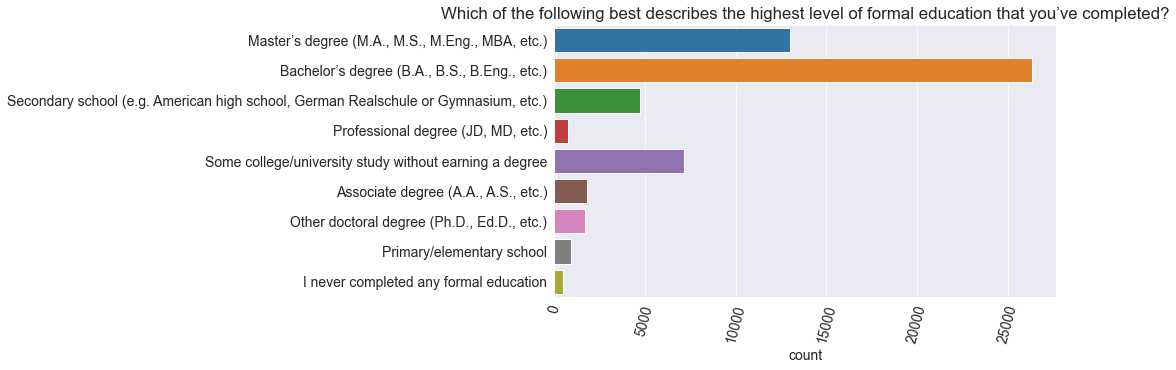

In [44]:
sns.countplot(y=data['EdLevel'])
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

Wydaje się, że ponad połowa respondentów posiada tytuł licencjata lub magistra, więc większość programistów wydaje się mieć wykształcenie wyższe. Jednak z samego tego wykresu nie wynika jasno, czy posiadają dyplom z informatyki.

Ćwiczenia: Wykres pokazuje obecnie liczbę respondentów dla każdej opcji. Czy możesz go zmodyfikować, aby zamiast tego pokazywał procent? Następnie spróbuj porównać wartości procentowe dla każdego stopnia dla mężczyzn i kobiet.

Narysujmy również kierunki studiów licencjackich, ale tym razem przekonwertujemy liczby na procenty i posortujemy wartości, aby ułatwić wizualizację kolejności.

In [45]:
schema.UndergradMajor

'What was your primary field of study?'

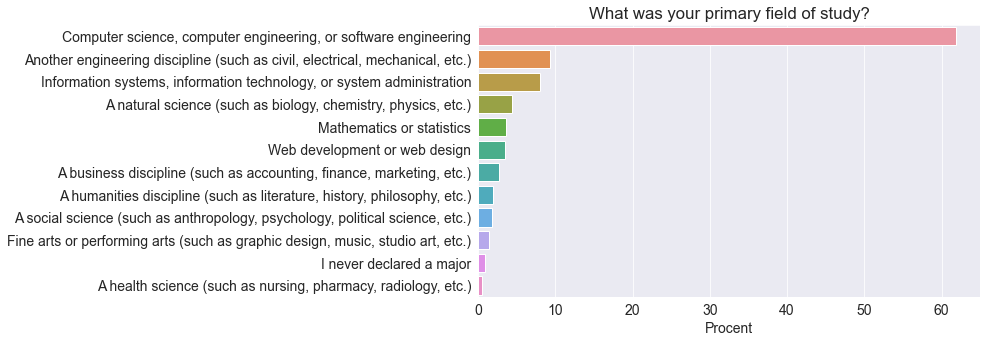

In [48]:
undergrad_pct = data['UndergradMajor'].value_counts() * 100 / data['UndergradMajor'].count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema['UndergradMajor'])
plt.ylabel(None);
plt.xlabel('Procent');

Okazuje się, że 40% programistów z wyższym wykształceniem ma kierunek inny niż informatyka - co jest bardzo zachęcające. Wydaje się to sugerować, że chociaż wykształcenie wyższe jest ogólnie pomocne, nie musisz studiować informatyki, aby odnieść sukces jako programista.

Ćwiczenia: Przeanalizuj kolumnę NEWEdImpt dla respondentów z wyższym wykształceniem w porównaniu z tymi, którzy ich nie mają. Czy dostrzegasz jakąś różnicę w opinii?

#### Atrybutu "Employment"
Praca na zlecenie lub praca na zlecenie to częsty wybór wśród programistów, więc byłoby interesujące porównać podział na pracę w pełnym wymiarze godzin, w niepełnym wymiarze godzin i pracę na własny rachunek. Zwizualizujmy dane z kolumny Zatrudnienie.

In [49]:
schema['Employment']

'Which of the following best describes your current employment status?'

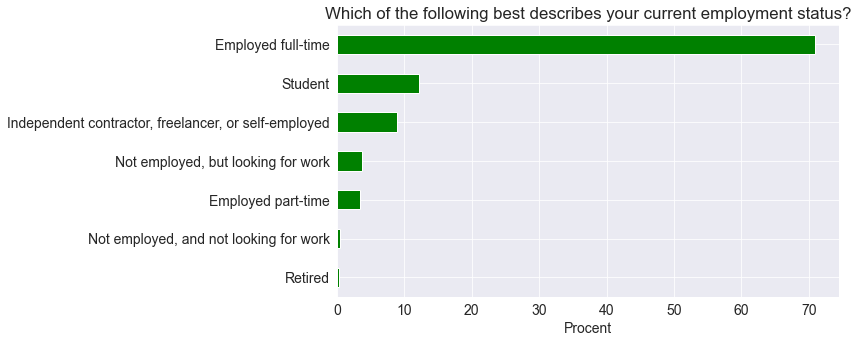

In [50]:
(data['Employment'].value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema['Employment'])
plt.xlabel('Procent');

#### Sprawdzamy ile atrybutów ma wartości puste

In [26]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
WorkWeekHrs,23493,36.5
NEWOvertime,21430,33.3
YearsCodePro,20512,31.9
JobSat,19471,30.3
Age,19238,29.9
NEWEdImpt,16214,25.2
JobFactors,15365,23.9
DevType,15323,23.8
Gender,14191,22.1
UndergradMajor,13687,21.3


#### Heatmapa brakujących wartości

<AxesSubplot:>

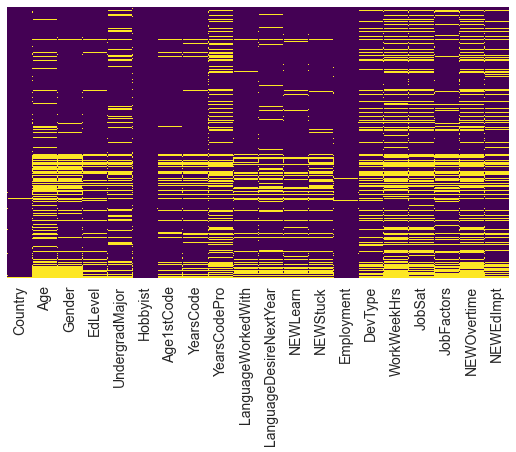

In [27]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Jak widać najwięcej pustych wartości zawierają kolumny "Age" oraz "Cabin". Ilość brakujących wartości atrybutu "Age" to około 20%, w dalszej części spróbujemy uzupełnić brakujące wartości. Natomiast braki atrybutu "Cabin" są na tyle duże, że nie jesteśmy w stanie przewidzieć wartości brakujących atrybutów.

#### Uzupełnimy brakujące wartośći atrybutu "Age"

Przyjrzymy się rozkładowi atrybutu "Age" ze względu na klasę poróży pasażerów, jak widać jedna z wartości przyjmuje wartość ponad 4000. Jest to dana odstająca, którą należy usunąć przed dalszą analizą.

In [28]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

ValueError: Could not interpret input 'Pclass'

<Figure size 864x504 with 0 Axes>

Usuwamy odstające wartości z atrybutu wiek. Przyjmuję że wszystkie wartości powyżej 100 oraz poniżej 0 są odstające. Wartość od 0 do 100, stanowią standardową długość życia człowieka.

In [ ]:
max_thresold = 100
min_thresold = 0
data[(data.Age > max_thresold) | (data.Age < min_thresold)]

In [ ]:
data.loc[(data.Age > max_thresold) | (data.Age < min_thresold), 'Age'] = np.nan

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

Teraz możemy rozwiązać problem z brakującymi wartościami atrybutu "Age". Utworzę tablicę zawierającą liczby losowe, które są obliczane na podstawie średniej wartości wieku w odniesieniu do odchylenia standardowego.

In [ ]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()

#  Losujmey wartości z przedziału wartości średniej i odchylenia standardowego atrybutu "Age"
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# Uzpełniamy puste wartości w atrybucie "Age" wylosowanymi wartościami
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)
data["Age"].isnull().sum()

Ponownie heatmap. Jak widać brakujące wartości atrybutu "Age" zostały usunięte.

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Następnie zajmiemy się wartością atrybutu "Cabin"
Atrybut "Cabin" zawiera bardzo dużo brakujących wartości. Atrybut "Cabin" przyjumuje zazwyczaj wzór „C123”, gdzie litera odnosi się do pokładu. Dlatego zamierzam ją wyodrębnić i stworzyć nowy atrybut, który zawiera tablicę pokładów. Następnie przekonwertujemy tą wartość na zmienną numeryczną. Brakujące wartości zostaną zamienione na zero.

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

data['Cabin'] = data['Cabin'].fillna("U0")
data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
data['Deck'] = data['Deck'].map(deck)
data['Deck'] = data['Deck'].fillna(0)
data['Deck'] = data['Deck'].astype(int)
    
# Możemy teraz usunąć atrybut Cabin
data = data.drop(['Cabin'], axis=1)

Wygląd zbioru po preprocessingu

In [ ]:
data

#### Przygotowanie wartośći atrybutu "Embarked"

Ponieważ atrybut "Embarked" ma tylko 2 brakujące wartości, wypełnimy je najczęściej występującymi wartościami.

In [ ]:
data['Embarked'].describe()

In [ ]:
common_value = 'S'

data['Embarked'] = data['Embarked'].fillna(common_value)

Zamienimy wartości atrybutu "Embarked", na wartości numeryczne

In [ ]:
data['Embarked'].unique()

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2, "So": 0, "Co": 1, "Qe": 2}

data['Embarked'] = data['Embarked'].map(ports)

#### Przygotowanie wartośći atrybutu "Name"

Wykorzystamy atrybut "Name", aby wyodrębnić tytuły z jego wartości. Stworzymy na podstawie tych wartości nowy atrybut.

In [ ]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

# Wyodrębnie tytułów
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Zamiana rzadko występujących tytułów na te bardziej popularne
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Zamiana tytłów na wartości numeryczne
data['Title'] = data['Title'].map(titles)

# Uzupełnienie pustych wartości, wartością 0
data['Title'] = data['Title'].fillna(0)

data = data.drop(['Name'], axis=1)

#### Przygotowanie wartości atrybutu "Sex"

Wartości występujące w atrybucie "Sex"

In [ ]:
data['Sex'].unique()

Zamieniamy wartości atrybutu "Sex", na wartości numeryczne.

In [ ]:
genders = {"male": 0, "female": 1, "malef": 0, "mal": 0, "fem": 1, "femmale": 1}
data['Sex'] = data['Sex'].map(genders)

#### Przygotowanie wartości atrybutu "Ticket"

In [ ]:
data['Ticket'].describe()

Ponieważ atrybut Ticket ma 681 unikalnych wartości, przekształcenie ich w przydatne kategorie byłoby nieco trudniejsze. Więc usuniemy go ze zbioru danych.

In [ ]:
data = data.drop(['Ticket'], axis=1)

## Krok 5: Pomiar dokładności klasyfikacji na przygotowanym zbiorze danych

W ostatnim kroku usnuniemy jeszcze ze zbioru niepotrzebne atrybuty, takie jak:  
PassengerId - Atrybut okresląjący id pasażera, nie wnoszący nic do analizy danych  
ship - Atrybut zawsze przyjmujący tą samą wartość.  
Survived - Atrybut decyzyjny

In [ ]:
X_data = data.drop(["PassengerId", "ship",  "Survived"], axis=1)
X_data

In [ ]:
Y_data = data.Survived;

decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree, X_data, Y_data, cv=10)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Udało się uzyskać dokładność na poziomie około 78%.

## Krok 6: Zapis zbioru i podsumowanie

#### Zapis zbioru do pliku

In [ ]:
data.to_csv('./data/stackoverflow.csv')

#### Podusmowanie
Przygotowanie zbioru pozwala wykorzystać go w różnego rodzaju analizach. Również przygotowany zbiór pozowli zauważyć więcej zależnosći w danych oraz uzyskać lepsze wyniki podczas wykorzystania algorytmów uczenia maszynowego.